In [668]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [669]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [670]:

df.isnull().sum()
df.shape[0],df.shape[1]

(891, 12)

In [671]:
df.drop(columns=['Cabin'],inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].value_counts()
df['Embarked'].fillna('S',inplace=True)
df.isnull().sum()

C:\Users\Al hamad\AppData\Local\Temp\ipykernel_2112\2855697090.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
C:\Users\Al hamad\AppData\Local\Temp\ipykernel_2112\2855697090.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [672]:
df['Age']=df["Age"].astype(int)
df['Survived']=df['Survived'].astype('category')
df['Embarked']=df['Embarked'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')

In [673]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [674]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Univariate Analysis:

Out of Total 891 62 people died in an accident


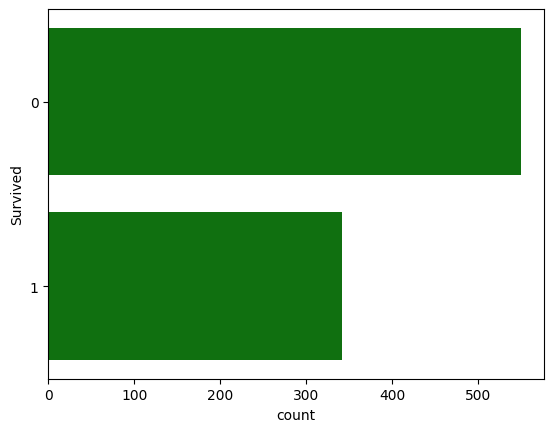

In [675]:
sns.countplot(df['Survived'],color='green')
death_percent=round((df['Survived'].value_counts().values[0]/891)*100)
print("Out of Total 891 {} people died in an accident".format(death_percent))

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Pclass'>

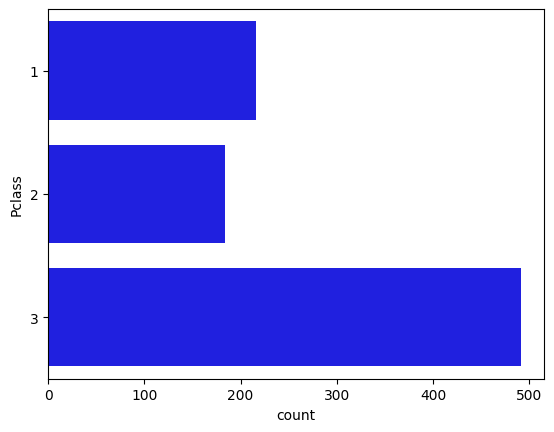

In [676]:
print((df['Pclass'].value_counts()/891)*100)
sns.countplot(df['Pclass'],color='blue')

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Sex'>

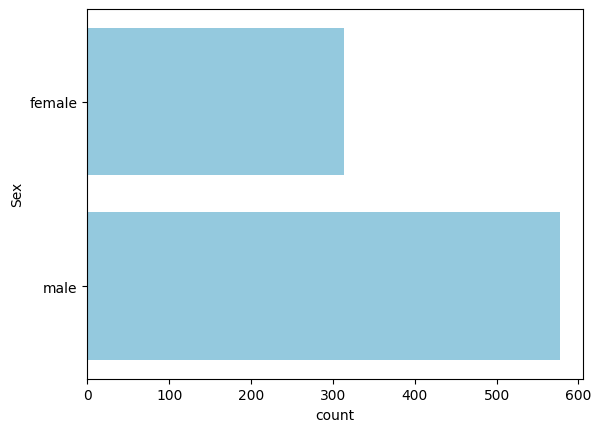

In [677]:
print((df['Sex'].value_counts()/891)*100)
sns.countplot(df['Sex'],color='skyblue')

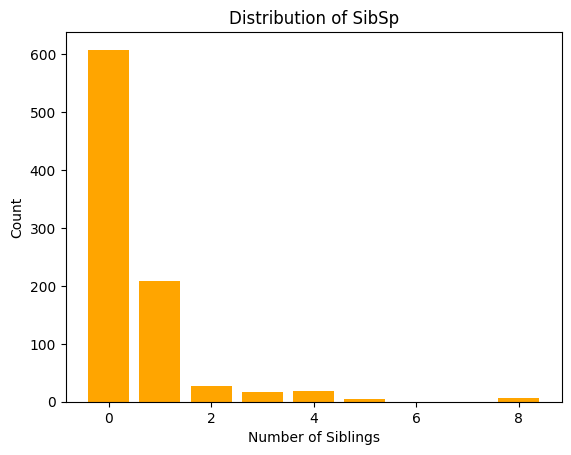

In [678]:
sibsp_counts = df['SibSp'].value_counts()
# Plot using Matplotlib
plt.bar(sibsp_counts.index, sibsp_counts.values, color='orange')

# Add labels and title
plt.xlabel('Number of Siblings')
plt.ylabel('Count')
plt.title('Distribution of SibSp')

plt.show()

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


Text(0.5, 1.0, 'Distribution of Parch')

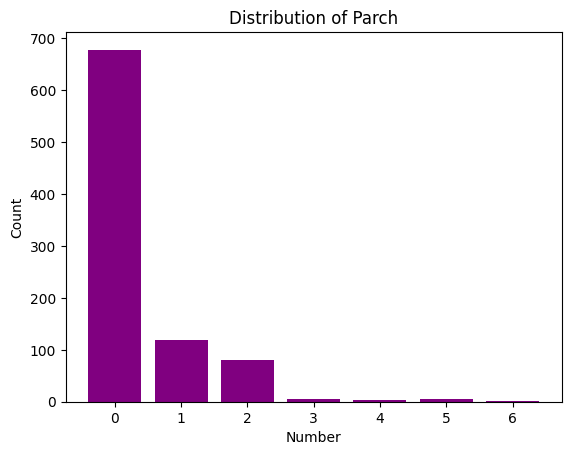

In [679]:
print((df['Parch'].value_counts()/891)*100)
plt.bar(df['Parch'].value_counts().index,df['Parch'].value_counts().values,color='purple')

# Add labels and title
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('Distribution of Parch')


Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


Text(0.5, 1.0, 'Distribution of Embarked')

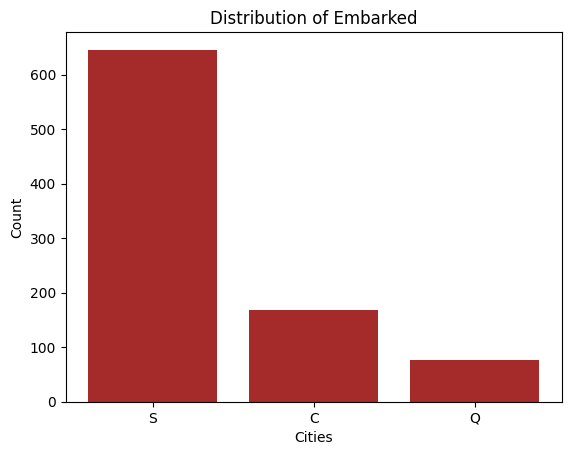

In [680]:
print((df['Embarked'].value_counts()/891)*100)
plt.bar(df["Embarked"].value_counts().index,df["Embarked"].value_counts().values,color='brown')

# Add labels and title
plt.xlabel('Cities')
plt.ylabel('Count')
plt.title('Distribution of Embarked')


0.45956263424701577
0.9865867453652877


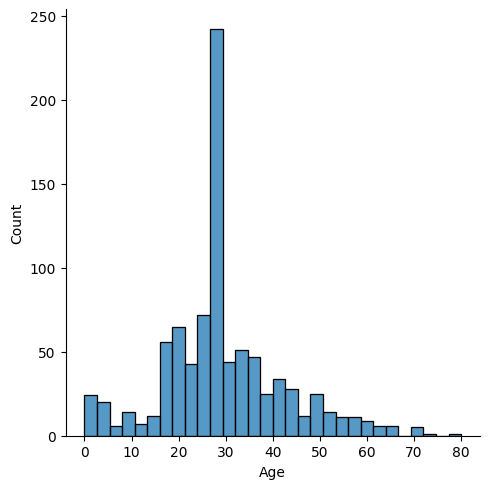

In [681]:
#age coloumn
sns.displot(df['Age'])
print(df["Age"].skew())
print(df['Age'].kurt())

<Axes: ylabel='Age'>

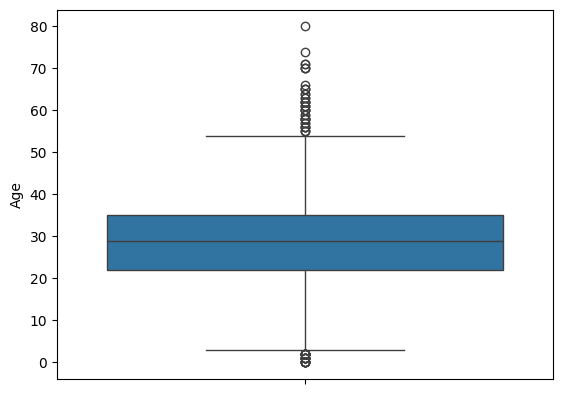

In [682]:
sns.boxplot(df['Age'])

4.787316519674893
33.39814088089868


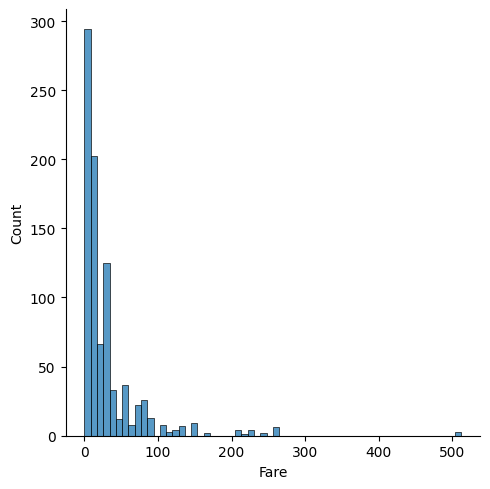

In [683]:
#fare coloumn
sns.displot(df['Fare'])
print(df["Fare"].skew())
print(df['Fare'].kurt())


<Axes: ylabel='Fare'>

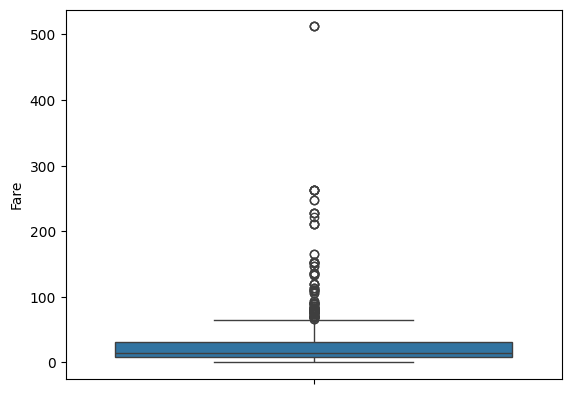

In [684]:
sns.boxplot(df['Fare'])

Multivariate Analysis:

<Axes: xlabel='Survived', ylabel='count'>

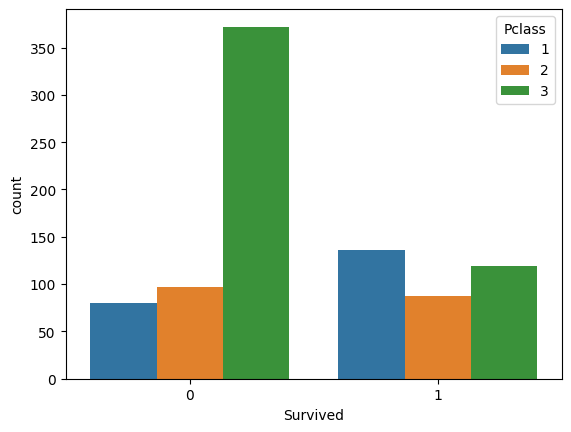

In [685]:
#survival with Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)

<Axes: xlabel='Survived', ylabel='count'>

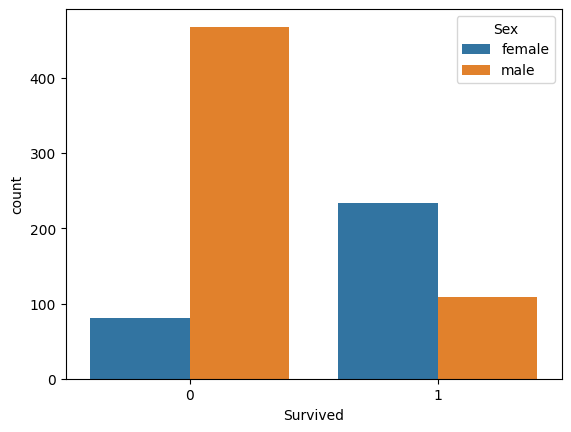

In [686]:
#Survival with Sex
sns.countplot(x='Survived', hue='Sex', data=df)

<Axes: xlabel='Survived', ylabel='count'>

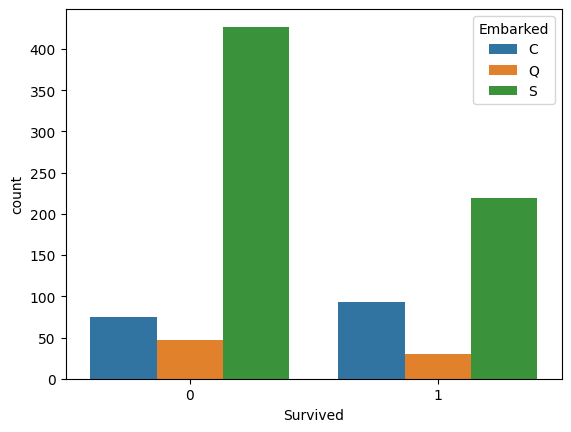

In [687]:
#survival with Embarked
sns.countplot(x='Survived', hue='Embarked', data=df)

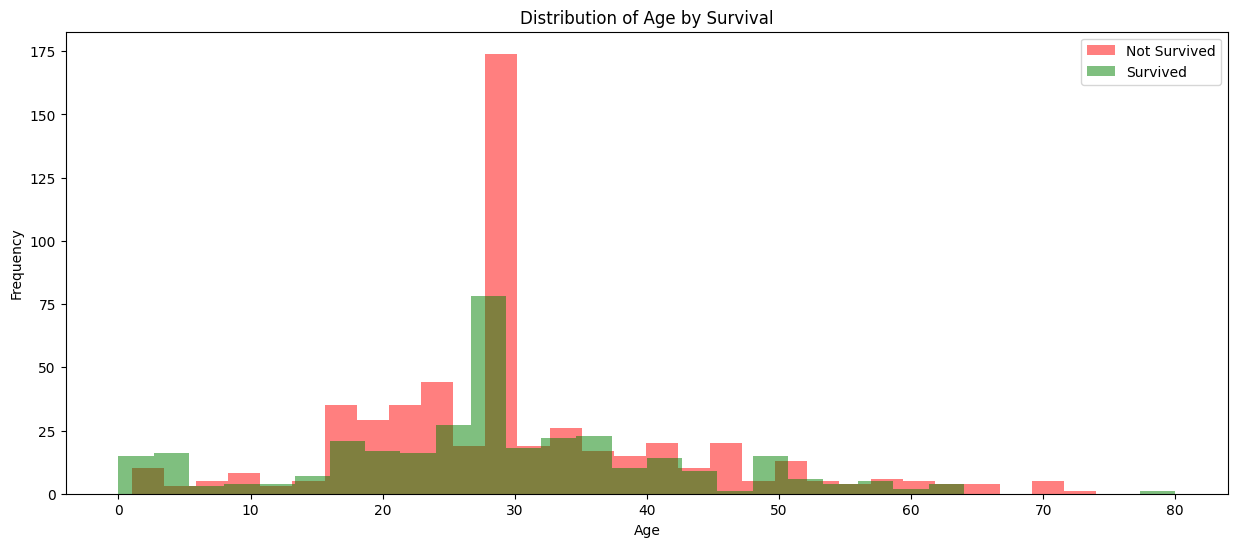

In [688]:

# Create figure
plt.figure(figsize=(15, 6))

# Plot histograms for both survival groups
plt.hist(df[df['Survived'] == 0]['Age'], bins=30, alpha=0.5, label='Not Survived', color='red')
plt.hist(df[df['Survived'] == 1]['Age'], bins=30, alpha=0.5, label='Survived', color='green')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Survival')
plt.legend()

plt.show()

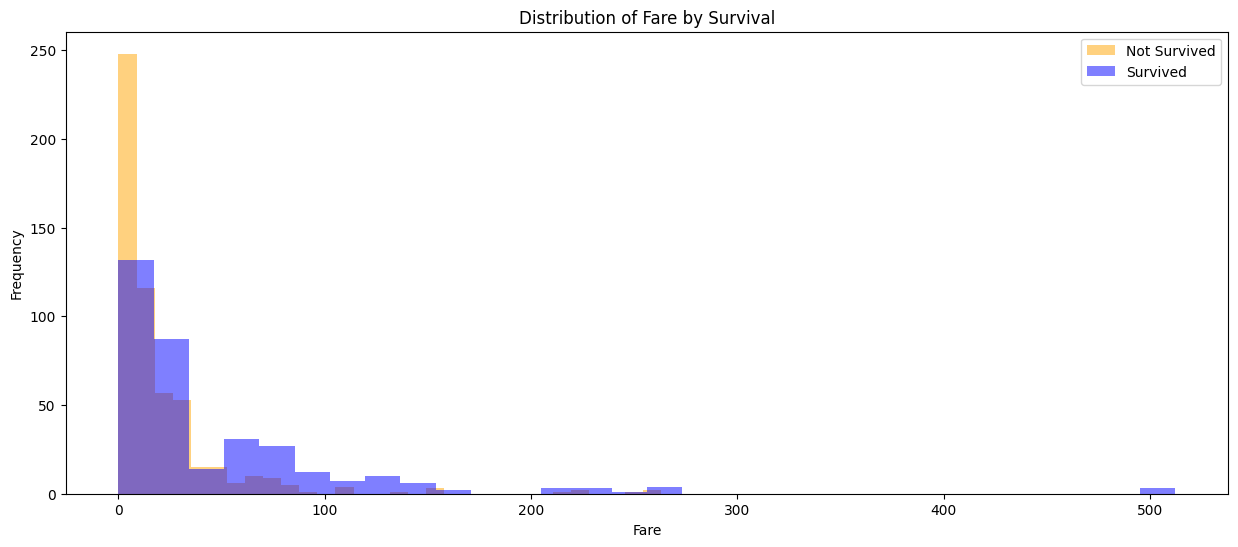

In [689]:

# Create figure
plt.figure(figsize=(15, 6))

# Plot histograms for Fare based on survival
plt.hist(df[df['Survived'] == 0]['Fare'], bins=30, alpha=0.5, label='Not Survived', color='orange')
plt.hist(df[df['Survived'] == 1]['Fare'], bins=30, alpha=0.5, label='Survived', color='blue')

# Labels, title, and legend
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare by Survival')
plt.legend()

plt.show()


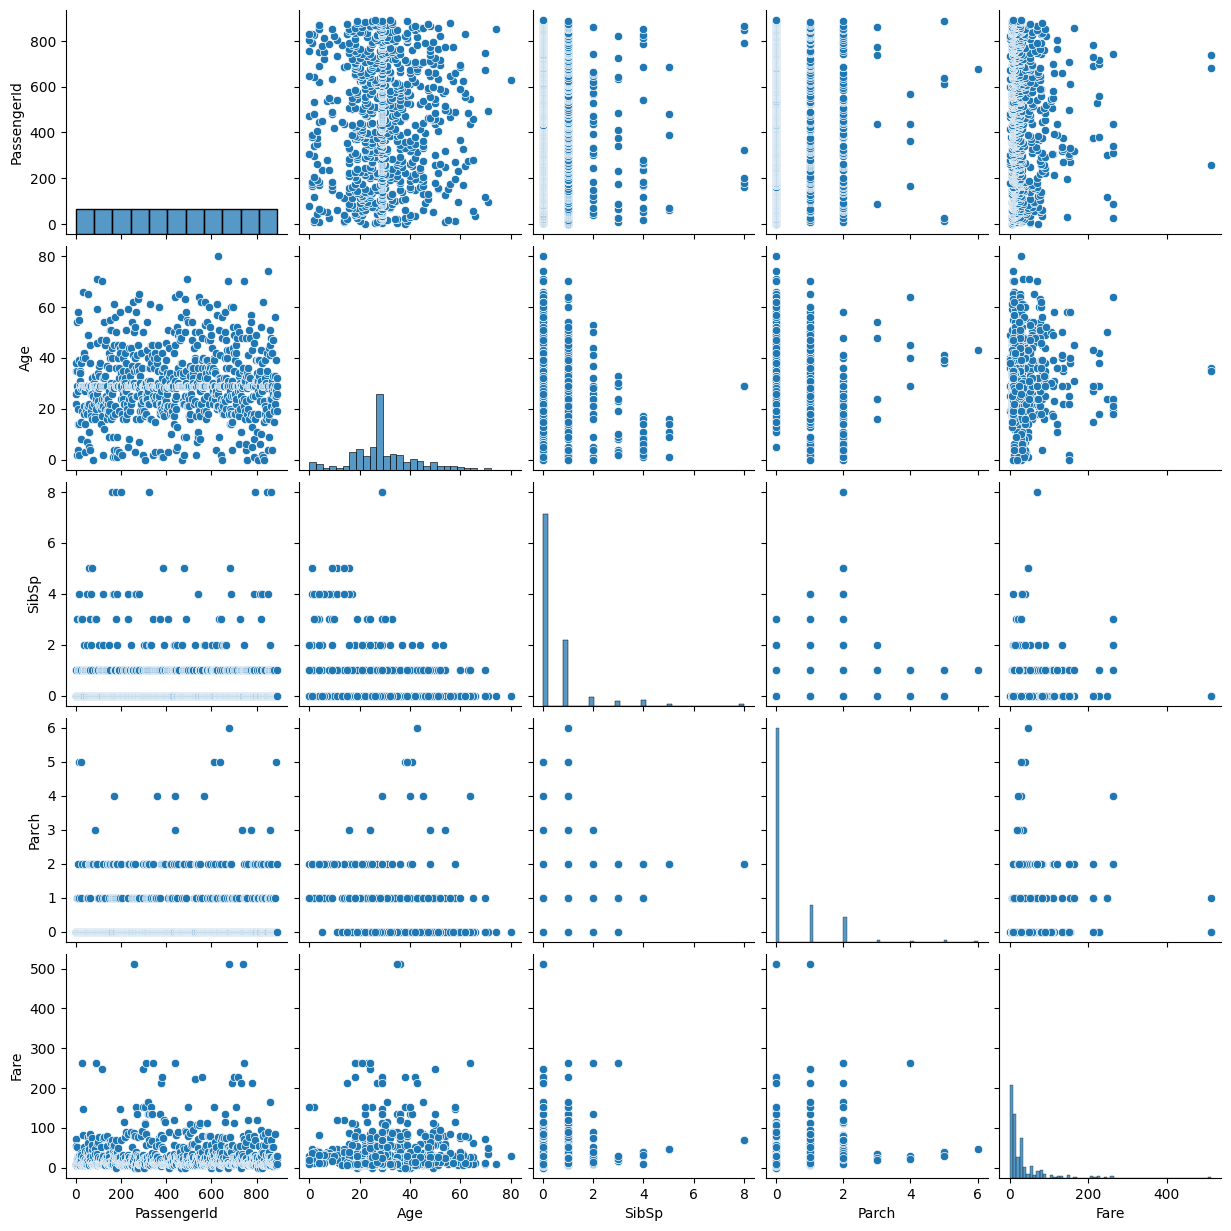

In [690]:
sns.pairplot(df)

<Axes: >

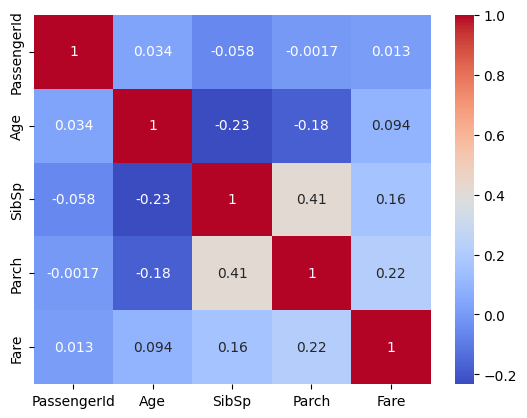

In [691]:
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')

### Drawing Conclusions
- Chance of female survival is higher than male survival
- Travelling in Pclass 3 was the deadliest
- People embarking from port 'C' (Cherbourg) had a higher survival rate
- People in the age range of 20 to 40 had a higher chance of not surviving
- People travelling with smaller families had a higher chance of survival compared to those with large families
- People travelling alone had a lower chance of survival compared to those with small families

### Communicating Results
- Write a detailed report or blog post explaining your analysis and findings with visuals
- Create a presentation (PPT) summarizing your process, insights, and visualizations for an audience
- Explain results face-to-face during meetings, discussions, or academic sessions to clarify the methodology and key insights
